In [515]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import datetime

In [302]:
# Covid DataFrame

In [517]:
path = r"E:\all_data_set\covid_19/covid_19_india.csv"
df_covid = pd.read_csv(path, index_col = 0, error_bad_lines = False)

In [304]:
df_covid

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
Sno,,,,,,,,
1.0,2020-01-30,6:00 PM,Kerala,1,0,0.0,0.0,1.0
2.0,2020-01-31,6:00 PM,Kerala,1,0,0.0,0.0,1.0
3.0,2020-02-01,6:00 PM,Kerala,2,0,0.0,0.0,2.0
4.0,2020-02-02,6:00 PM,Kerala,3,0,0.0,0.0,3.0
5.0,2020-02-03,6:00 PM,Kerala,3,0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [306]:
df_covid.head()

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
Sno,,,,,,,,
1.0,2020-01-30,6:00 PM,Kerala,1,0,0.0,0.0,1.0
2.0,2020-01-31,6:00 PM,Kerala,1,0,0.0,0.0,1.0
3.0,2020-02-01,6:00 PM,Kerala,2,0,0.0,0.0,2.0
4.0,2020-02-02,6:00 PM,Kerala,3,0,0.0,0.0,3.0
5.0,2020-02-03,6:00 PM,Kerala,3,0,0.0,0.0,3.0


# Some basic analysis

In [307]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 15114 entries, 1.0 to nan
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      15086 non-null  object 
 1   Time                      15086 non-null  object 
 2   State/UnionTerritory      15086 non-null  object 
 3   ConfirmedIndianNational   15086 non-null  object 
 4   ConfirmedForeignNational  15086 non-null  object 
 5   Cured                     15086 non-null  float64
 6   Deaths                    15086 non-null  float64
 7   Confirmed                 15086 non-null  float64
dtypes: float64(3), object(5)
memory usage: 1.0+ MB


In [308]:
df_covid.drop(["Time", "ConfirmedIndianNational", "ConfirmedForeignNational"], inplace = True, axis = 1)

In [309]:
df_covid.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
Sno,,,,,
1.0,2020-01-30,Kerala,0.0,0.0,1.0
2.0,2020-01-31,Kerala,0.0,0.0,1.0
3.0,2020-02-01,Kerala,0.0,0.0,2.0
4.0,2020-02-02,Kerala,0.0,0.0,3.0
5.0,2020-02-03,Kerala,0.0,0.0,3.0


In [310]:
df_covid["Date"] = pd.to_datetime(df_covid["Date"], format = "%Y-%m-%d")

In [311]:
df_covid.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
Sno,,,,,
1.0,2020-01-30,Kerala,0.0,0.0,1.0
2.0,2020-01-31,Kerala,0.0,0.0,1.0
3.0,2020-02-01,Kerala,0.0,0.0,2.0
4.0,2020-02-02,Kerala,0.0,0.0,3.0
5.0,2020-02-03,Kerala,0.0,0.0,3.0


In [312]:
df_covid.describe()

,Cured,Deaths,Confirmed
count,1.508600e+04,15086.000000,1.508600e+04
mean,1.747937e+05,2721.084449,1.942820e+05
std,3.648330e+05,7182.672358,4.095184e+05
min,0.000000e+00,0.000000,0.000000e+00
25%,1.685000e+03,12.000000,2.935500e+03
50%,1.964700e+04,364.000000,2.608150e+04
75%,2.087552e+05,2170.000000,2.216012e+05
max,4.927480e+06,83777.000000,5.433506e+06


In [518]:
# Vaccinated DataFrame

In [671]:
path = r"E:\all_data_set\covid_19/covid_vaccine_statewise.csv"
df_vacc = pd.read_csv(path, error_bad_lines = False)

In [672]:
df_vacc

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,11/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7841,12/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7842,13/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7843,14/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Total active cases of covid:-

In [316]:
df_covid.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
Sno,,,,,
1.0,2020-01-30,Kerala,0.0,0.0,1.0
2.0,2020-01-31,Kerala,0.0,0.0,1.0
3.0,2020-02-01,Kerala,0.0,0.0,2.0
4.0,2020-02-02,Kerala,0.0,0.0,3.0
5.0,2020-02-03,Kerala,0.0,0.0,3.0


In [669]:
df_covid["Active_cases"] = df_covid["Confirmed"] - (df_covid["Cured"] + df_covid["Deaths"])

In [673]:
df_covid.sort_values("Active_cases", ascending = False)

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Active_cases
Sno,,,,,,,,,
14135.0,2021-04-23,8:00 AM,Maharashtra,-,-,3330747.0,62479.0,4094840.0,701614.0
14243.0,2021-04-26,8:00 AM,Maharashtra,-,-,3530060.0,64760.0,4295027.0,700207.0
14099.0,2021-04-22,8:00 AM,Maharashtra,-,-,3268449.0,61911.0,4027827.0,697467.0
14207.0,2021-04-25,8:00 AM,Maharashtra,-,-,3468610.0,63928.0,4228836.0,696298.0
14171.0,2021-04-24,8:00 AM,Maharashtra,-,-,3404792.0,63252.0,4161676.0,693632.0
...,...,...,...,...,...,...,...,...,...
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [675]:
df_covid.iloc[[1201,205,301]]

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Active_cases
Sno,,,,,,,,,
1202.0,2020-04-22,5:00 PM,Himachal Pradesh,-,-,16.0,1.0,39.0,22.0
206.0,2020-03-18,6:00 PM,Ladakh,8,0,0.0,0.0,8.0,8.0
302.0,2020-03-23,6:00 PM,Kerala,60,7,3.0,0.0,67.0,64.0


In [676]:
### total active cases in Ladakh
df_covid[df_covid["State/UnionTerritory"] == "Ladakh"].iloc[[250,350,420]]

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Active_cases
Sno,,,,,,,,,
8329.0,2020-11-12,8:00 AM,Ladakh,-,-,6118.0,86.0,7134.0,930.0
11901.0,2021-02-20,8:00 AM,Ladakh,-,-,9614.0,130.0,9785.0,41.0
14420.0,2021-05-01,8:00 AM,Ladakh,-,-,12376.0,143.0,13969.0,1450.0


# Statewise Recovery rate and Mortality rate

In [677]:
statewise = pd.pivot_table(df_covid, values = ["Confirmed", "Deaths", "Cured"], index = "State/UnionTerritory", aggfunc = "max")
statewise

,Confirmed,Cured,Deaths
State/UnionTerritory,,,
Andaman and Nicobar Islands,6674.0,6359.0,92.0
Andhra Pradesh,1475372.0,1254291.0,9580.0
Arunachal Pradesh,22462.0,19977.0,88.0
Assam,340858.0,290774.0,2344.0
Bihar,664115.0,595377.0,4039.0
Cases being reassigned to states,9265.0,0.0,0.0
Chandigarh,56513.0,48831.0,647.0
Chhattisgarh,925531.0,823113.0,12036.0
Dadra and Nagar Haveli and Daman and Diu,9652.0,8944.0,4.0


In [322]:
# it gives the 'same result' which is above by 'group by aggregation' function

In [678]:
estatewise_1 = df_covid.groupby("State/UnionTerritory")[["Confirmed", "Cured", "Deaths"]].max()

In [679]:
### this is a simple calculation of percentage recovery rate on total confirmed cases in each state
statewise["Recovery_rate"] = np.round((statewise["Cured"]*100)/statewise["Confirmed"],2)
statewise["Mortality_rate"] = np.round((statewise["Deaths"]*100)/statewise["Confirmed"],2)

In [680]:
statewise.sort_values(by = "Confirmed", ascending = False)

,Confirmed,Cured,Deaths,Recovery_rate,Mortality_rate
State/UnionTerritory,,,,,
Maharashtra,5433506.0,4927480.0,83777.0,90.69,1.54
Karnataka,2272374.0,1674487.0,22838.0,73.69,1.01
Kerala,2200706.0,1846105.0,6612.0,83.89,0.30
Tamil Nadu,1664350.0,1403052.0,18369.0,84.30,1.10
Uttar Pradesh,1637663.0,1483249.0,18072.0,90.57,1.10
Andhra Pradesh,1475372.0,1254291.0,9580.0,85.02,0.65
Delhi,1402873.0,1329899.0,22111.0,94.80,1.58
West Bengal,1171861.0,1026492.0,13576.0,87.60,1.16
Chhattisgarh,925531.0,823113.0,12036.0,88.93,1.30


### Top 10 states based on the number of Active cases

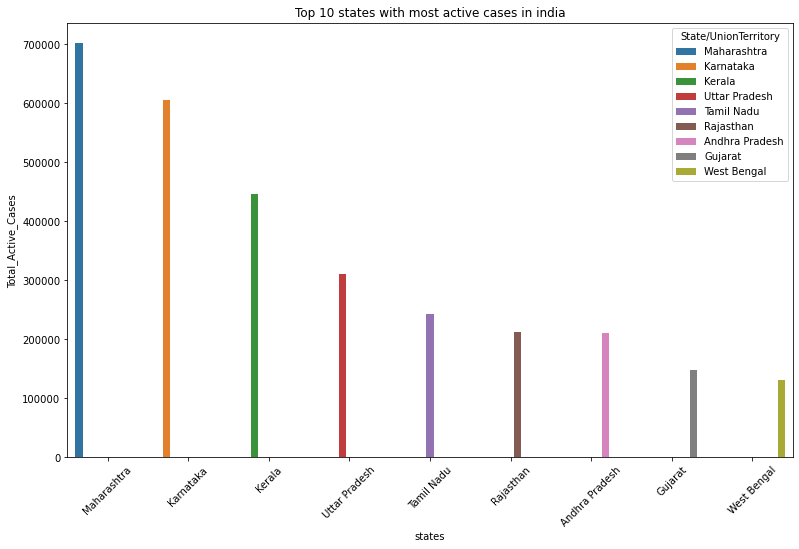

In [681]:
top_10_states_active_cases = df_covid.groupby(["State/UnionTerritory"]).max()[["Active_cases", "Date"]].reset_index().sort_values(by = "Active_cases", ascending = False).iloc[0:9]
plt.figure(figsize=(13,8))
sns.barplot(data = top_10_states_active_cases, x = "State/UnionTerritory", y = "Active_cases", hue = "State/UnionTerritory")
plt.xticks(rotation = 45)
plt.xlabel("states")
plt.ylabel("Total_Active_Cases")
plt.title("Top 10 states with most active cases in india")
plt.show()

### Top 10 'states' based on the number of 'Deaths' report

In [682]:
top_10_states_highest_Deaths = df_covid.groupby("State/UnionTerritory")[["Deaths", "Date"]].max().reset_index().sort_values(by = "Deaths", ascending = False)

In [683]:
top_10_states_highest_Deaths

,State/UnionTerritory,Deaths,Date
22,Maharashtra,83777.0,2021-05-19
17,Karnataka,22838.0,2021-05-19
10,Delhi,22111.0,2021-05-19
32,Tamil Nadu,18369.0,2021-05-19
37,Uttar Pradesh,18072.0,2021-05-19
39,West Bengal,13576.0,2021-05-19
29,Punjab,12317.0,2021-05-19
7,Chhattisgarh,12036.0,2021-05-19
1,Andhra Pradesh,9580.0,2021-05-19
12,Gujarat,9269.0,2021-05-19


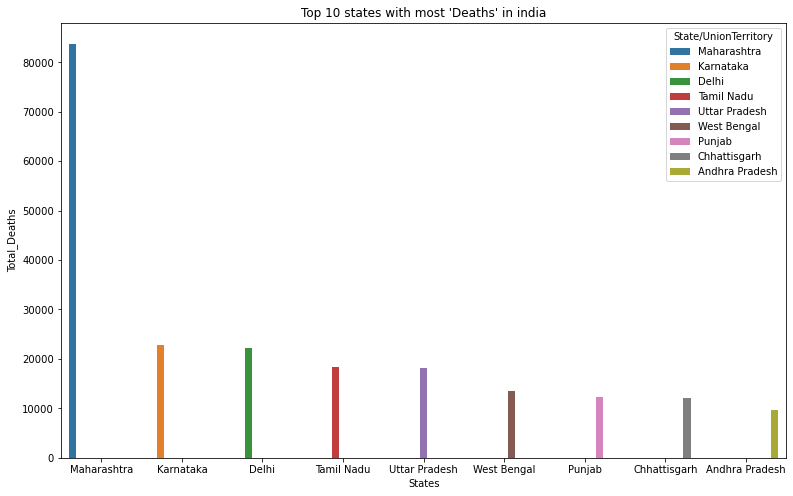

In [684]:
plt.figure(figsize=(13, 8))
sns.barplot(data = top_10_states_highest_Deaths[0:9], x = "State/UnionTerritory", y = "Deaths", hue = "State/UnionTerritory", linewidth = 10)
plt.xlabel("States")
plt.ylabel("Total_Deaths")
plt.title("Top 10 states with most 'Deaths' in india")
plt.show()

In [691]:
#### This is called 'multi-indexing' :-
df_covid.groupby("State/UnionTerritory")[["Deaths","Date"]].agg(["max", "min"]).head(10)

Deaths             Date            
                                              max  min         max         min
State/UnionTerritory                                                          
Andaman and Nicobar Islands                  92.0  0.0  2021-05-19  2020-03-26
Andhra Pradesh                             9580.0  0.0  2021-05-19  2020-03-12
Arunachal Pradesh                            88.0  0.0  2021-05-19  2020-04-03
Assam                                      2344.0  0.0  2021-05-19  2020-04-01
Bihar                                      4039.0  1.0  2021-05-19  2020-03-22
Cases being reassigned to states              0.0  0.0  2020-07-18  2020-05-20
Chandigarh                                  647.0  0.0  2021-05-19  2020-03-19
Chhattisgarh                              12036.0  0.0  2021-05-19  2020-03-19
Dadra and Nagar Haveli and Daman and Diu      4.0  0.0  2021-05-19  2020-05-06
Daman & Diu                                   0.0  0.0  2020-06-11  2020-06-11

In [696]:
df_2 = df_covid[df_covid["State/UnionTerritory"].isin(["Maharashtra", "Karnataka", "Kerala","Uttar Pradesh", "Tamil Nadu"])].sort_values(by = "Deaths", ascending = False)
df_2.head()

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Active_cases
Sno,,,,,,,,,
15071.0,2021-05-19,8:00 AM,Maharashtra,-,-,4927480.0,83777.0,5433506.0,422249.0
15035.0,2021-05-18,8:00 AM,Maharashtra,-,-,4874582.0,82486.0,5405068.0,448000.0
14999.0,2021-05-17,8:00 AM,Maharashtra,-,-,4826371.0,81486.0,5378452.0,470595.0
14963.0,2021-05-16,8:00 AM,Maharashtra,-,-,4767053.0,80512.0,5344063.0,496498.0
14927.0,2021-05-15,8:00 AM,Maharashtra,-,-,4707980.0,79552.0,5309215.0,521683.0


In [721]:
top_5_affected_states = df_2.groupby(["State/UnionTerritory"]).max()[["Active_cases"]].reset_index().sort_values(by = "Active_cases", ascending = False)
top_5_affected_states

,State/UnionTerritory,Active_cases
2,Maharashtra,701614.0
0,Karnataka,605515.0
1,Kerala,445692.0
4,Uttar Pradesh,310783.0
3,Tamil Nadu,242929.0


### Top 5 affected states in india

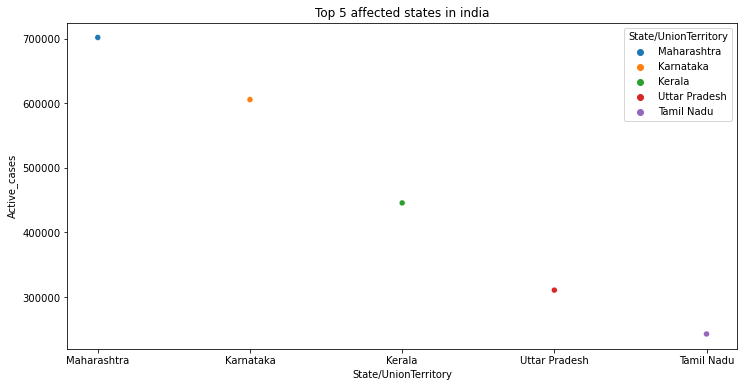

In [727]:
### Scatterplot
plt.figure(figsize=(12, 6))
sns.scatterplot(data = top_5_affected_states, x = "State/UnionTerritory", y = "Active_cases", hue = "State/UnionTerritory")
plt.title("Top 5 affected states in india")
plt.show()


In [512]:
 df_1 = df_covid[df_covid["State/UnionTerritory"].isin(["Maharashtra", "Karnataka", "Kerala","Uttar Pradesh", "Tamil Nadu"])]

In [514]:
df_1["State/UnionTerritory"].unique()

array(['Kerala', 'Uttar Pradesh', 'Tamil Nadu', 'Karnataka',
       'Maharashtra'], dtype=object)

In [621]:
df_vacc

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,11/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7841,12/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7842,13/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7843,14/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [622]:
### Simply i have changed the 'column' name.
df_vacc.rename(columns = {"Updated On" : "Vaccine_Date"}, inplace = True)

In [623]:
df_vacc

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,11/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7841,12/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7842,13/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7843,14/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Some basic analysis on "df_vacc" DataFrame

In [624]:
df_vacc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Vaccine_Date                         7845 non-null   object 
 1   State                                7845 non-null   object 
 2   Total Doses Administered             7621 non-null   float64
 3   Sessions                             7621 non-null   float64
 4    Sites                               7621 non-null   float64
 5   First Dose Administered              7621 non-null   float64
 6   Second Dose Administered             7621 non-null   float64
 7   Male (Doses Administered)            7461 non-null   float64
 8   Female (Doses Administered)          7461 non-null   float64
 9   Transgender (Doses Administered)     7461 non-null   float64
 10   Covaxin (Doses Administered)        7621 non-null   float64
 11  CoviShield (Doses Administered

In [625]:
df_vacc.describe()

,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
count,7.621000e+03,7.621000e+03,7621.000000,7.621000e+03,7.621000e+03,7.461000e+03,7.461000e+03,7461.000000,7.621000e+03,7.621000e+03,...,1.702000e+03,1.702000e+03,1.702000e+03,3.733000e+03,3.734000e+03,3.734000e+03,1.600000e+02,1.600000e+02,160.000000,5.919000e+03
mean,9.188171e+06,4.792358e+05,2282.872064,7.414415e+06,1.773755e+06,3.620156e+06,3.168416e+06,1162.978019,1.044669e+06,8.126553e+06,...,8.773958e+06,7.442161e+06,5.641605e+06,1.395895e+06,2.916515e+06,2.627444e+06,4.461687e+07,3.951018e+07,12370.543750,4.547842e+06
std,3.746180e+07,1.911511e+06,7275.973730,2.995209e+07,7.570382e+06,1.737938e+07,1.515310e+07,5931.353995,4.452259e+06,3.298414e+07,...,2.660829e+07,2.225999e+07,1.681650e+07,5.501454e+06,9.567607e+06,8.192225e+06,3.950749e+07,3.417684e+07,12485.026753,1.834182e+07
min,7.000000e+00,0.000000e+00,0.000000,7.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000,0.000000e+00,7.000000e+00,...,2.662400e+04,1.681500e+04,9.994000e+03,1.059000e+03,1.136000e+03,5.580000e+02,2.375700e+04,2.451700e+04,2.000000,7.000000e+00
25%,1.356570e+05,6.004000e+03,69.000000,1.166320e+05,1.283100e+04,5.655500e+04,5.210700e+04,8.000000,0.000000e+00,1.331340e+05,...,4.344842e+05,2.326275e+05,1.285605e+05,5.655400e+04,9.248225e+04,5.615975e+04,5.739350e+06,5.023407e+06,1278.750000,7.427550e+04
50%,8.182020e+05,4.547000e+04,597.000000,6.614590e+05,1.388180e+05,3.897850e+05,3.342380e+05,113.000000,1.185100e+04,7.567360e+05,...,3.095970e+06,2.695938e+06,1.805696e+06,2.947270e+05,8.330395e+05,7.887425e+05,3.716590e+07,3.365402e+07,8007.500000,4.022880e+05
75%,6.625243e+06,3.428690e+05,1708.000000,5.387805e+06,1.166434e+06,2.735777e+06,2.561513e+06,800.000000,7.579300e+05,6.007817e+06,...,7.366241e+06,6.969726e+06,5.294763e+06,9.105160e+05,2.499280e+06,2.337874e+06,7.441663e+07,6.685368e+07,19851.000000,3.501562e+06
max,5.132284e+08,3.501031e+07,73933.000000,4.001504e+08,1.130780e+08,2.701636e+08,2.395186e+08,98275.000000,6.236742e+07,4.468251e+08,...,2.243304e+08,1.667575e+08,1.186927e+08,9.224315e+07,9.096888e+07,6.731098e+07,1.349420e+08,1.156684e+08,46462.000000,2.506569e+08


In [626]:
### total missing values across all the columns
df_vacc.isnull().sum()

Vaccine_Date                              0
State                                     0
Total Doses Administered                224
Sessions                                224
 Sites                                  224
First Dose Administered                 224
Second Dose Administered                224
Male (Doses Administered)               384
Female (Doses Administered)             384
Transgender (Doses Administered)        384
 Covaxin (Doses Administered)           224
CoviShield (Doses Administered)         224
Sputnik V (Doses Administered)         4850
AEFI                                   2407
18-44 Years (Doses Administered)       6143
45-60 Years (Doses Administered)       6143
60+ Years (Doses Administered)         6143
18-44 Years(Individuals Vaccinated)    4112
45-60 Years(Individuals Vaccinated)    4111
60+ Years(Individuals Vaccinated)      4111
Male(Individuals Vaccinated)           7685
Female(Individuals Vaccinated)         7685
Transgender(Individuals Vaccinat

In [627]:
df_vacc.head()

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


### "Male" Vs "Female" individual vaccinated

In [628]:
df_vacc.columns

Index(['Vaccine_Date', 'State', 'Total Doses Administered', 'Sessions',
       ' Sites ', 'First Dose Administered', 'Second Dose Administered',
       'Male (Doses Administered)', 'Female (Doses Administered)',
       'Transgender (Doses Administered)', ' Covaxin (Doses Administered)',
       'CoviShield (Doses Administered)', 'Sputnik V (Doses Administered)',
       'AEFI', '18-44 Years (Doses Administered)',
       '45-60 Years (Doses Administered)', '60+ Years (Doses Administered)',
       '18-44 Years(Individuals Vaccinated)',
       '45-60 Years(Individuals Vaccinated)',
       '60+ Years(Individuals Vaccinated)', 'Male(Individuals Vaccinated)',
       'Female(Individuals Vaccinated)', 'Transgender(Individuals Vaccinated)',
       'Total Individuals Vaccinated'],
      dtype='object')

In [656]:
male_female = df_vacc[["Male(Individuals Vaccinated)", "Female(Individuals Vaccinated)"]]

In [657]:
male_female

,Male(Individuals Vaccinated),Female(Individuals Vaccinated)
0,23757.0,24517.0
1,27348.0,31252.0
2,41361.0,58083.0
3,81901.0,113613.0
4,98111.0,153145.0
...,...,...
7840,NaN,NaN
7841,NaN,NaN
7842,NaN,NaN
7843,NaN,NaN


In [660]:
male_female["Male(Individuals Vaccinated)"].sum()

7138698858.0

In [658]:
male_female["Female(Individuals Vaccinated)"].sum()

6321628736.0

In [661]:
labels = ["Female(Individuals Vaccinated)" ,"Male(Individuals Vaccinated)"]
values = [male_female["Female(Individuals Vaccinated)"].sum(), male_female["Male(Individuals Vaccinated)"].sum()]

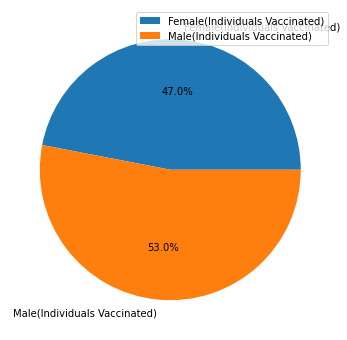

In [662]:
plt.figure(figsize=(8,6))
plt.pie(x = values, labels = labels, data = male_female, autopct = "%1.1f%%")
plt.legend(loc = "upper right")
plt.show()

In [663]:
total_vaccinated = male_female["Male(Individuals Vaccinated)"].sum()+male_female["Female(Individuals Vaccinated)"].sum()

In [664]:
np.round(male_female["Male(Individuals Vaccinated)"].sum()*100/total_vaccinated,1)

53.0

In [665]:
np.round(male_female["Female(Individuals Vaccinated)"].sum()*100/total_vaccinated,1)

47.0

### Remove all rows where state = "India"

In [611]:
df_vacc.head()

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,579.0,47697.0,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,635.0,57969.0,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,1299.0,98150.0,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,3017.0,192508.0,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,3946.0,247334.0,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [728]:
vaccine = df_vacc[df_vacc["State"] != "India"]

In [737]:
vaccine.head(5)

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
214,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0
215,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0
216,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.0


In [743]:
vaccine.rename(columns = {"Total Individuals Vaccinated" : "Total"}, inplace = True)
vaccine.head()

C:\Users\Ravi\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
214,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0
215,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0
216,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.0


### Records for 'maximum vaccination' in each states/Highest record number of vaccination in each states.

In [745]:
vaccine.keys()

Index(['Updated On', 'State', 'Total Doses Administered', 'Sessions',
       ' Sites ', 'First Dose Administered', 'Second Dose Administered',
       'Male (Doses Administered)', 'Female (Doses Administered)',
       'Transgender (Doses Administered)', ' Covaxin (Doses Administered)',
       'CoviShield (Doses Administered)', 'Sputnik V (Doses Administered)',
       'AEFI', '18-44 Years (Doses Administered)',
       '45-60 Years (Doses Administered)', '60+ Years (Doses Administered)',
       '18-44 Years(Individuals Vaccinated)',
       '45-60 Years(Individuals Vaccinated)',
       '60+ Years(Individuals Vaccinated)', 'Male(Individuals Vaccinated)',
       'Female(Individuals Vaccinated)', 'Transgender(Individuals Vaccinated)',
       'Total'],
      dtype='object')

In [750]:
vaccine["State"].nunique()

36

In [803]:
Highest_rec = vaccine.groupby("State").max()[["Total"]].sort_values(by = "Total", ascending = False).reset_index()
Highest_rec

,State,Total
0,Uttar Pradesh,24782239.0
1,Maharashtra,24046509.0
2,Rajasthan,19090259.0
3,Gujarat,18826982.0
4,Karnataka,17493598.0
5,Madhya Pradesh,16512594.0
6,West Bengal,15798841.0
7,Bihar,13127210.0
8,Tamil Nadu,11658908.0
9,Andhra Pradesh,11586263.0


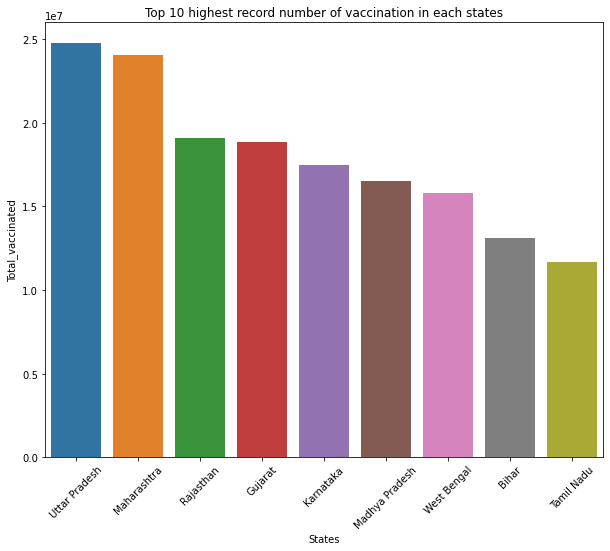

In [805]:
plt.figure(figsize=(10,8))
sns.barplot(x = "State", y = "Total", data = Highest_rec[0:9])
plt.xlabel("States")
plt.ylabel("Total_vaccinated")
plt.title("Top 10 highest record number of vaccination in each states")
plt.xticks(rotation = 45)
plt.show()

### Top 5 Vaccinated states

In [831]:
top_5 = vaccine.groupby("State")[["Total"]].sum().sort_values(by = "Total", ascending = False).reset_index()
top_5

,State,Total
0,Maharashtra,1.403075e+09
1,Uttar Pradesh,1.200575e+09
2,Rajasthan,1.141163e+09
3,Gujarat,1.078261e+09
4,West Bengal,9.250227e+08
5,Karnataka,8.685235e+08
6,Madhya Pradesh,7.718640e+08
7,Bihar,6.608479e+08
8,Kerala,6.208252e+08
9,Andhra Pradesh,5.645911e+08


In [835]:
### top 5 vaccinated states :-
top_5[0:5]

,State,Total
0,Maharashtra,1.403075e+09
1,Uttar Pradesh,1.200575e+09
2,Rajasthan,1.141163e+09
3,Gujarat,1.078261e+09
4,West Bengal,9.250227e+08


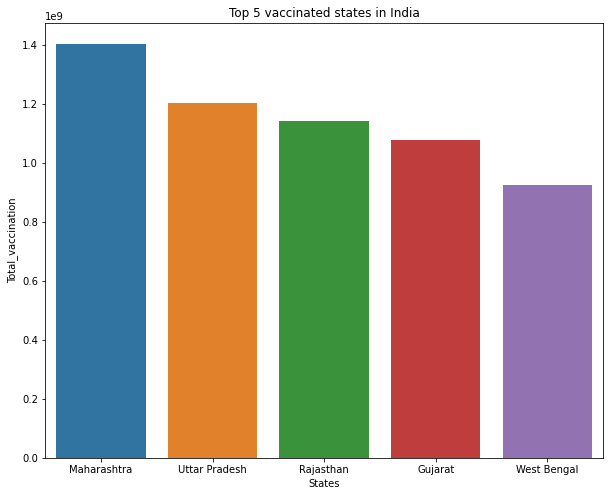

In [839]:
plt.figure(figsize=(10,8))
sns.barplot(x = "State", y = "Total", data = top_5[0:5])
plt.xlabel("States")
plt.ylabel("Total_vaccination")
plt.title("Top 5 vaccinated states in India")
plt.show()
